      x         y  distance_from_1  distance_from_2  closest color Salary
0    32      0.00     66319.740433     29096.361675        2     g  Above
1    20      0.00     66319.743049     29096.367730        2     g  Above
2    36      0.00     66319.740044     29096.360756        2     g  Above
3    21  26734.99     39584.754676      2361.452416        2     g  Above
4    24  15325.23     50994.512550     13771.140485        2     g  Above
..   ..       ...              ...              ...      ...   ...    ...
995  56  22306.84     44012.902638      6789.537655        2     g  Above
996  54  27704.97     38614.772269      1391.454099        2     g  Above
997  22  62542.89      3776.894995     33446.534840        1     r  Below
998  49  96745.84     30426.101305     67649.480132        1     r  Below
999  51  48651.47     17668.273039     19555.112342        1     r  Below

[1000 rows x 7 columns]
Above    528
Below    472
Name: Salary, dtype: int64


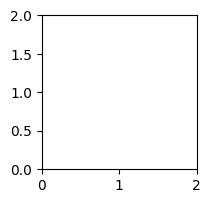

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

import copy

'''First step: read the data from the frame or file, Divide the data into the cluster k and initialize 
random centroids to each cluster from the given data. 
Assign color to the centroids colmap.
'''
df = pd.read_csv('Comp1801CourseworkData.csv')
salary = df['Age']
salary.values.tolist()

y = df['Salary']

'''First step: read the data from the frame or file, Divide the data into the cluster k and initialize 
random centroids to each cluster from the given data. 
Assign color to the centroids colmap.
'''

df = pd.DataFrame({
    'x': salary,
    'y': y,

})

np.random.seed(10)
k =2
#centroids[i] = [x, y]

centroids = {
    i+1: [np.random.randint(0, 20), np.random.randint(0, 20)]
    for i in range(k)
}

colmap = {1: 'r', 2:'g'}
review = {1: 'Below', 2: 'Above'}


#Assignment state 

''' Calculate the distance from each points to the cluter's centroid and take the mean value. 
Reapeat the step until the mean value becomes stable.'''

def assignment(df, centroids):
    
    for i in centroids.keys():
        #sqrt((x1-x2)^2-(y1-y2)^2)
        df['distance_from_{}'.format(i)] = (
        np.sqrt(
            (df['x']  - centroids[i][0]) ** 2 
            + (df['y'] - centroids[i][1]) ** 2
            )
        )

        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    df['Salary'] = df['closest'].map(lambda x: review[x])
    
    return df

df = assignment(df, centroids)


#update_stage

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
        
    return k 

centroids = update(centroids)
        

## Repeat Assignment stage 

df = assignment(df, centroids)


while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    
    
    if closest_centroids.equals(df['closest']):
        break

print(df)
count_above_or_below = df['Salary'].value_counts()
print(count_above_or_below)

#plot the final result.

fig = plt.figure(figsize=(2, 2))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=1, edgecolor='k')

for i in centroids.keys():
    a = plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.show()